# 6장. 로지스틱 회귀 모델: 참 거짓 판단하기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch06-colab.ipynb)

## 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

### 1.환경 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

### 2. 데이터 준비

In [3]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) # 0: 불합격, 1: 합격

### 3. 모델 실행

In [5]:
model = Sequential()

model.add(Input(shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

# 이진 분류 손실 함수 - binary_crossentropy
# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy')

history = model.fit(x, y, epochs=5000, verbose=0)

In [11]:
for epoch, loss in enumerate(history.history['loss']):
    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1}, loss: {loss}")
else:
    print(f"Epoch: {epoch + 1}, loss: {loss}")



Epoch: 1, loss: 1.8975204229354858
Epoch: 101, loss: 0.5065394043922424
Epoch: 201, loss: 0.48479530215263367
Epoch: 301, loss: 0.46481212973594666
Epoch: 401, loss: 0.4464310109615326
Epoch: 501, loss: 0.42950576543807983
Epoch: 601, loss: 0.4139012396335602
Epoch: 701, loss: 0.39949342608451843
Epoch: 801, loss: 0.38616928458213806
Epoch: 901, loss: 0.3738264739513397
Epoch: 1001, loss: 0.36237233877182007
Epoch: 1101, loss: 0.3517237603664398
Epoch: 1201, loss: 0.341806024312973
Epoch: 1301, loss: 0.3325520157814026
Epoch: 1401, loss: 0.3239017128944397
Epoch: 1501, loss: 0.3158011734485626
Epoch: 1601, loss: 0.30820223689079285
Epoch: 1701, loss: 0.3010614812374115
Epoch: 1801, loss: 0.2943403720855713
Epoch: 1901, loss: 0.28800347447395325
Epoch: 2001, loss: 0.282019704580307
Epoch: 2101, loss: 0.27636075019836426
Epoch: 2201, loss: 0.2710011303424835
Epoch: 2301, loss: 0.26591771841049194
Epoch: 2401, loss: 0.26108965277671814
Epoch: 2501, loss: 0.2564981281757355
Epoch: 2601, lo

### 4. 모델 테스트

1/1 [==============================] - 0s 63ms/step


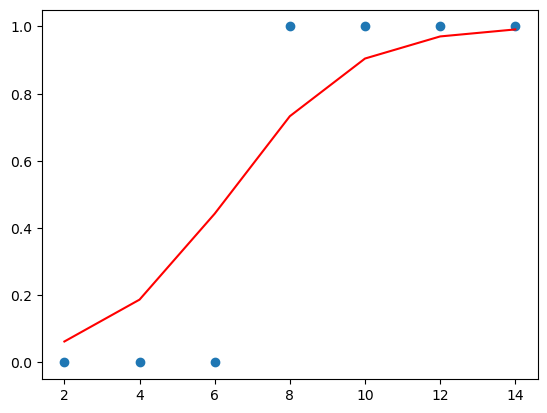

In [12]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [13]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 39ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다
